<a href="https://colab.research.google.com/github/Mjcherono/TrialProjects/blob/main/Copy_of_Python_Programming_Quantile_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Programming: Quantile Regression

As we have seen, linear regression models make a key assumption about the random error term in the linear model. The assumption is that the error term has a constant variance across the values of independent variable X. However, when the assumption is no longer true, we use quantile regression. The following example will help us understand how we can use quantile regression while working on such a problem.

## Example: Quantile Regression

In [ ]:
# Importing the required libraries
# 
import numpy as np 
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'Data with constant variance')

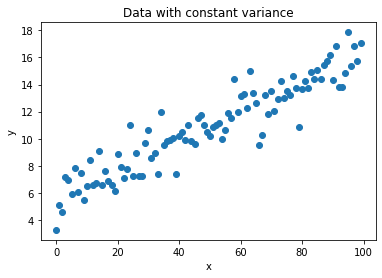

In [ ]:
## Generating some data with constant variance /noise
# This is the assumption of linear regression
# 
x = np.arange(100).reshape(100,1)
intercept_ = 6
slope_ = 0.1

## non constant error
error_ = np.random.normal(size = (100,1), loc = 0.0, scale = 1)

## Regression equation
y = intercept_ + slope_ * x + error_

plt.figure(1)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data with constant variance")

# When we move from left to right along the x-axis, 
# we won’t see a lot of variation in the values of y. 
# An linear regression would be the ideal candidate 
# here to model the data.

In [ ]:
## Creating a linear regression model regression on the above dataset
#
from sklearn.linear_model import LinearRegression

model1 = LinearRegression(fit_intercept = True, normalize = False)
model1.fit(x, y)

y_pred1 = model1.predict(x)

print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred1 - y) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(x, y)))


Mean squared error: 1.37
Variance score: 0.87


Text(0.5, 1.0, 'Linear regression')

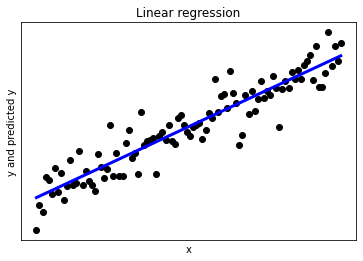

In [ ]:
## Plotting the regression
plt.figure(2)
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred1, color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Linear regression")

# This will lead to us having modeled our data well on our dataset.
# Our variance score of 0.88 is close to 1 which usually is when
# we model our data perfectly. 
# NB: our variance score will vary based on the randomly generated values above

Text(0.5, 1.0, 'Data with non-constant variance')

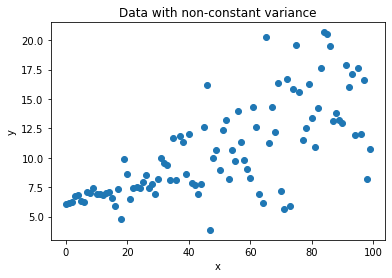

In [ ]:
## Now let get to work with some data that violates 
# our linear regression assumption. This means first 
# adding some noise to our dataset. 
# We will first generating some data with non-constant variance
# 
x_ = np.arange(100).reshape(100,1)
intercept_ = 6
slope_ = 0.1

## Non constant variance
var_ = 0.1 + 0.05 * x_

## non constant error
error_ = np.random.normal(size = (100,1), loc = 0.0, scale = var_)

## Linear egression equation
y_ = intercept_ + slope_ * x + error_

plt.figure(3)
plt.scatter(x_, y_)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data with non-constant variance")

# From our graph, we will get to see that a phenomenon
# where the variability of y is unequal across the range 
# of values of x is called as Heteroscedasticity. 
# As it will be seen in the plot it takes the shape of a cone. 
# The y variable widens as the value of x increases.

In [ ]:
## Let's now trying to fit a linear regression
# 
model2 = LinearRegression(fit_intercept = True, normalize = False)
model2.fit(x_, y_)

y_pred2 = model2.predict(x_)

print
print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred2 - y_) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(x_, y_)))

# With a low variance score of 0.51, it means that our linear regression 
# did not do a good job. 

Mean squared error: 8.34
Variance score: 0.49


Text(0.5, 1.0, 'Linear regression on data with non-constant variance')

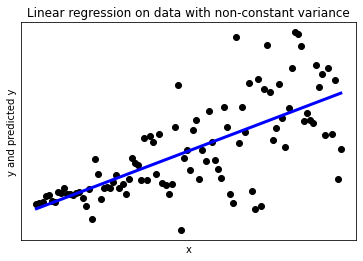

In [ ]:
## We can also see this by plotting the regression below
#
plt.figure(4)
plt.scatter(x_, y_,  color='black')
plt.plot(x_, y_pred2, color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Linear regression on data with non-constant variance")

# We will get to observe that our line of best fit is far from perfect

In [ ]:
# Now implementing quantile regression for the median, 0.5th quantile
#

# We import the required libraries
#  
import pandas as pd 

# We take the data into a pandas dataframe so that 
# its easier for us to work with statsmodel interfaces. 
# Our dataframe data has two columns, ‘x’ and ‘y’
#
data = pd.DataFrame(data = np.hstack([x_, y_]), columns = ["x", "y"])
data.head()

,x,y
0,0.0,6.075236
1,1.0,6.194199
2,2.0,6.252956
3,3.0,6.769093
4,4.0,6.796561


In [ ]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ x', data)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

# You see that our intercept is 6.0978 and our slope or the coefficient for our x is 0.0976. 
# These are the parameters for the 0.5th quantile of our y. 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3780
Model:                       QuantReg   Bandwidth:                       2.615
Method:                 Least Squares   Sparsity:                        6.544
Date:                Mon, 16 Nov 2020   No. Observations:                  100
Time:                        14:58:30   Df Residuals:                       98
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8932      0.650      9.073      0.000       4.604       7.182
x              0.0897      0.011      7.910      0.000       0.067       0.112


In [ ]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   6.008859  0.022644        0.003097        0.042191
1  0.2   5.879581  0.053095        0.034497        0.071693
2  0.3   6.018523  0.063219        0.043975        0.082464
3  0.4   5.821769  0.083125        0.062343        0.103906
4  0.5   5.893200  0.089660        0.067165        0.112156
5  0.6   5.773362  0.111462        0.088431        0.134493
6  0.7   6.070044  0.124156        0.102099        0.146212
7  0.8   6.114547  0.136225        0.114130        0.158320
8  0.9   6.075236  0.156631        0.133496        0.179766


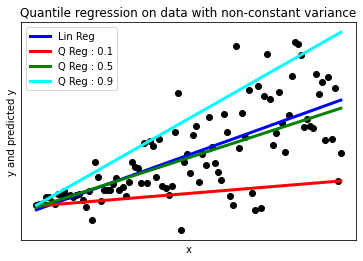

In [ ]:
## Let us now plot 0.1th, 0.5th and 0.9th quantile models against our original data.
# 
plt.figure(5)
plt.scatter(x_, y_,  color='black')
plt.plot(x_, y_pred2, color='blue',
         linewidth=3, label='Lin Reg')

y_pred3 = models[0].params['Intercept'] + models[0].params['x'] * x_
plt.plot(x_, y_pred3, color='red',
         linewidth=3, label='Q Reg : 0.1')

y_pred4 = models[4].params['Intercept'] + models[4].params['x'] * x_
plt.plot(x_, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['x'] * x_
plt.plot(x_, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()

# Linear regression is plotted with the blue colored line. 
# We can compare that model with other quantile models.

<Figure size 432x288 with 0 Axes>

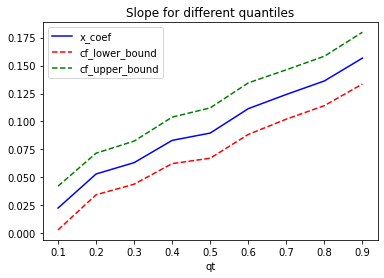

In [ ]:
## Plot the changes in the quantile coeffiecients
# 
plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
	title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])
plt.show()

# We would be able to see how the slope value varies for different quantiles. 
# Compared with linear regression which is flat across all the quantiles, 
# Quantile Regression allows us to investigate into the different areas of the data 
# and model them appropriately.

## <font color="green">Challenge 1</font>

In [ ]:
# Challenge 1
# ---
# Question: Study the factors that influence total medical expenditures for people with low-, medium-, and high- expenditures.
# ---
# Dataset url = http://bit.ly/QuantileHealthDataset
# ---
# Info:
# Data are from the Medical Expenditure Panel Survey (MEPS)
# Dependent variable: total medical expenditures
# Independent variables: has supplemental insurance, total number of chronic conditions, age, female, and white
# 
h = pd.read_csv('http://bit.ly/QuantileHealthDataset')
h.head()

,dupersid,totexp,ltotexp,suppins,totchr,age,female,white
0,93193020,3,1.098612,1,0,69,0,1
1,72072017,6,1.791759,1,0,65,1,1
2,25296013,9,2.197225,0,0,85,1,1
3,23628011,14,2.639057,0,0,76,1,1
4,95041014,18,2.890372,0,1,71,1,1


In [ ]:
#
x_c1 = h.drop(['totexp'], axis=1)
y_c1 = h['totexp']

print(x_c1)
print(y_c1)

import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y_c1 ~ x_c1', h)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

      dupersid    ltotexp  suppins  totchr  age  female  white
0     93193020   1.098612        1       0   69       0      1
1     72072017   1.791759        1       0   65       1      1
2     25296013   2.197225        0       0   85       1      1
3     23628011   2.639057        0       0   76       1      1
4     95041014   2.890372        0       1   71       1      1
...        ...        ...      ...     ...  ...     ...    ...
2950  26147015  11.535690        1       4   80       1      1
2951  21857010  11.560030        0       2   69       1      1
2952  93171014  11.592250        1       1   65       0      1
2953  90613022  11.724890        1       3   66       1      1
2954  91755011  11.740940        1       3   84       1      1

[2955 rows x 7 columns]
0            3
1            6
2            9
3           14
4           18
         ...  
2950    102303
2951    104823
2952    108256
2953    123611
2954    125610
Name: totexp, Length: 2955, dtype: int64
             

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [ ]:
# 
quantiles = np.arange(0.1,1,0.4) 
models = []
params = []
i = [0, 1, 2, 3, 4, 5, 6]
# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x_c1[0]']] + res.conf_int().loc['x_c1[0]'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(h = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


TypeError: ignored

## <font color="green">Challenge 2

In [ ]:
# Challenge 2
# ---
# Question: Given the household income data, determine the effect of predictor variables on the independent variable.
# ---
# Dataset source = http://bit.ly/USHouseholdDataset
# ---
# 
house = pd.read_csv('/content/kaggle_income.csv', encoding='ISO-8859-1')
house.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [ ]:
#
x_c2 = house[['ALand', 'AWater']]
y_c2 = house['sum_w']

print(x_c2)
print(y_c2)

import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y_c2 ~ x_c2', house)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

          ALand     AWater
0      10894952     909156
1      26070325      23254
2      44835274     261034
3      36878729    2374530
4      16204185  413605152
...         ...        ...
32521    589417       1691
32522   1801613     795887
32523  11031227          0
32524         0   33597561
32525   6476604    2717115

[32526 rows x 2 columns]
0        1638.260513
1         258.017685
2         926.031000
3         378.114619
4         282.320328
            ...     
32521    1321.278082
32522     238.813450
32523     313.551070
32524       0.000000
32525     512.884803
Name: sum_w, Length: 32526, dtype: float64
                         QuantReg Regression Results                          
Dep. Variable:                   y_c2   Pseudo R-squared:              -0.5004
Model:                       QuantReg   Bandwidth:                       44.44
Method:                 Least Squares   Sparsity:                        2800.
Date:                Mon, 16 Nov 2020   No. Observations:   

## <font color="green">Challenge 3</font>

In [ ]:
# Challenge 3
# ---
# Question: Create a regression model on the following dataset.
# ---
# Dataset url = http://bit.ly/MtCarsDataset
# ---
cars = pd.read_csv('http://bit.ly/MtCarsDataset')
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
#
x_c3 = cars.drop(['model', 'mpg'], axis=1)
y_c3 = cars['mpg']

print(x_c3)
print(y_c3)

import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y_c3 ~ x_c3', cars)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

    cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0     6  160.0  110  3.90  2.620  16.46   0   1     4     4
1     6  160.0  110  3.90  2.875  17.02   0   1     4     4
2     4  108.0   93  3.85  2.320  18.61   1   1     4     1
3     6  258.0  110  3.08  3.215  19.44   1   0     3     1
4     8  360.0  175  3.15  3.440  17.02   0   0     3     2
5     6  225.0  105  2.76  3.460  20.22   1   0     3     1
6     8  360.0  245  3.21  3.570  15.84   0   0     3     4
7     4  146.7   62  3.69  3.190  20.00   1   0     4     2
8     4  140.8   95  3.92  3.150  22.90   1   0     4     2
9     6  167.6  123  3.92  3.440  18.30   1   0     4     4
10    6  167.6  123  3.92  3.440  18.90   1   0     4     4
11    8  275.8  180  3.07  4.070  17.40   0   0     3     3
12    8  275.8  180  3.07  3.730  17.60   0   0     3     3
13    8  275.8  180  3.07  3.780  18.00   0   0     3     3
14    8  472.0  205  2.93  5.250  17.98   0   0     3     4
15    8  460.0  215  3.00  5.424  17.82 